In [1]:
import pandas as pd

In [2]:
import os

# PPO Analysis

In [3]:
base = './tmp_mp_ppo/'
files = [base + f for f in os.listdir(base)]
files = [f for f in files if 'csv' in f]
files = sorted(
    files, 
    key=lambda x : int(x.split("/")[-1].split(".")[0])
)
files

['./tmp_mp_ppo/0.monitor.csv',
 './tmp_mp_ppo/1.monitor.csv',
 './tmp_mp_ppo/2.monitor.csv',
 './tmp_mp_ppo/3.monitor.csv',
 './tmp_mp_ppo/4.monitor.csv',
 './tmp_mp_ppo/5.monitor.csv',
 './tmp_mp_ppo/6.monitor.csv',
 './tmp_mp_ppo/7.monitor.csv',
 './tmp_mp_ppo/8.monitor.csv',
 './tmp_mp_ppo/9.monitor.csv',
 './tmp_mp_ppo/10.monitor.csv',
 './tmp_mp_ppo/11.monitor.csv']

In [4]:
csvs = [
    pd.read_csv(
        f, skiprows=[0]
    ) for f in files
]

In [5]:
def cluster_by_t(df):
    new_csv0 = df.copy(deep=True)
    new_csv0['t_int'] = new_csv0['t'].apply(int)
    new_csv0 = new_csv0.groupby('t_int').agg({'r': 'mean'}).reset_index()
    new_csv0 = new_csv0.iloc[::10]
    return new_csv0

In [6]:
csvs = [cluster_by_t(df) for df in csvs]
large_df = pd.concat(csvs).reset_index(drop='index')
large_df = large_df.groupby('t_int').agg({'r': 'mean'}).reset_index()

In [7]:
large_df

,t_int,r
0,2,-3.336111
1,54,-3.277778
2,55,-0.626984
3,104,-1.505556
4,105,-2.238757
...,...,...
609,4978,1.821429
610,4979,0.214286
611,4980,1.016667
612,5002,3.066667


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

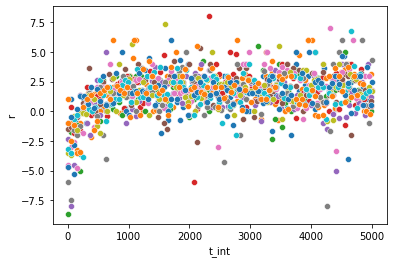

In [9]:
for df in csvs:
    sns.scatterplot(data=df, x='t_int', y='r')
plt.show()

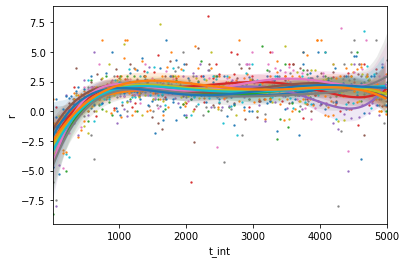

In [10]:
for df in csvs:
    sns.regplot(data=df, x='t_int', y='r', scatter_kws={"s": 2}, order=5)
plt.show()

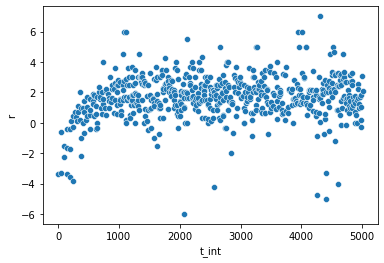

In [11]:
sns.scatterplot(data=large_df, x='t_int', y='r')
plt.show()

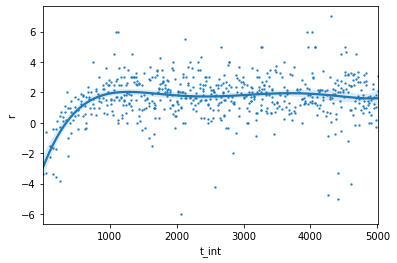

In [12]:
sns.regplot(data=large_df, x='t_int', y='r', scatter_kws={"s": 2}, order=5)
plt.show()

In [13]:
from stable_baselines3.common.results_plotter import X_TIMESTEPS, plot_results

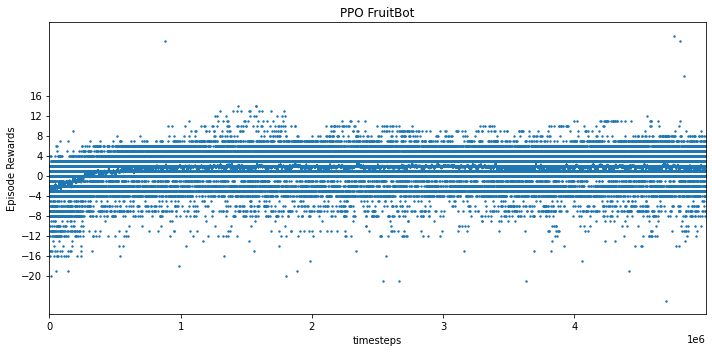

In [14]:
timesteps = 1e6 * 5
plot_results(
    [base], timesteps, X_TIMESTEPS, "PPO FruitBot", figsize=(10, 5)
)
plt.yticks([i for i in range(-20, 20, 4)])
plt.show()

# DQN Analysis

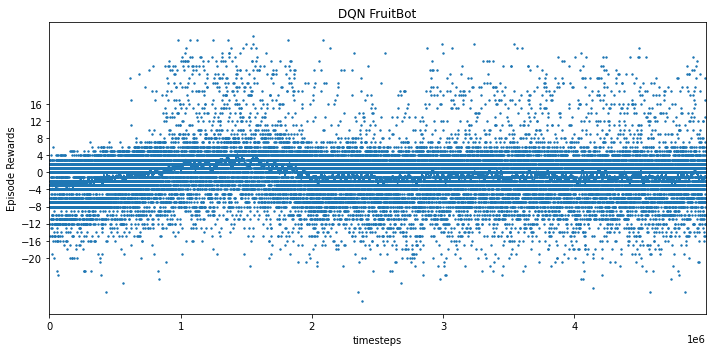

In [15]:
base = './tmp_mp_dqn/'

timesteps = 1e6 * 5
plot_results(
    [base], timesteps, X_TIMESTEPS, "DQN FruitBot", figsize=(10, 5)
)
plt.yticks([i for i in range(-20, 20, 4)])
plt.show()

# A2C Analysis

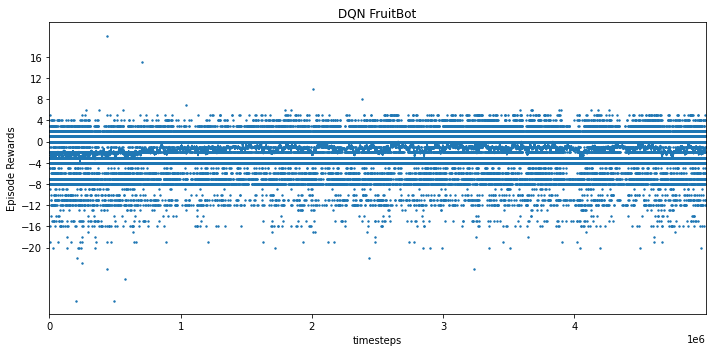

In [16]:
base = './tmp_mp_a2c/'

timesteps = 1e6 * 5
plot_results(
    [base], timesteps, X_TIMESTEPS, "DQN FruitBot", figsize=(10, 5)
)
plt.yticks([i for i in range(-20, 20, 4)])
plt.show()